In [ ]:
!pip install pafy
!pip install youtube-dl
#!pip uninstall -y opencv-python opencv-contrib-python
#!apt install python3-opencv

In [1]:
# widgets Tool
 
import ipywidgets as widgets
from IPython.display import clear_output
from IPython.display import Javascript, display
import uuid

style = {'description_width': '250px'}
layout = {'width': '500px'}
 
def addVisText(key='',value='',disabled=False, layout=layout):
    text = widgets.Text(description = key,value = value, style=style, layout=layout,disabled=disabled)
    display(text)  
    return text
    
def addVisCheckbox(key='',value=False,disabled=False):
    text = widgets.Checkbox(description = key,value = value,disabled=disabled, style=style, layout=layout)
    display(text)   
    return text

def addHeader(text='', bold=True):
    if bold == True:
        html = widgets.HTML(
        value="<b>" + text + "</b>",
        description=' ',
        style=style, layout=layout
        )
    else:
        html = widgets.HTML(
        value=text,
        description=' ',
        style=style, layout=layout
        )
    display(html)    

In [2]:
#!pip install opencv-python
#!python -m pip install imutils
import cv2
import numpy as np
from PIL import Image

from IPython.display import display, clear_output
from PIL import ImageChops
import time

import numpy as np
from base.image_tool  import ImageTool
import io

def getByteArray(image):    
    img_byte_arr = io.BytesIO()
    image.save(img_byte_arr, format='PNG')
    img_byte_arr = img_byte_arr.getvalue()
    return img_byte_arr

In [135]:
import pafy
import cv2
import time

#EarthCam Live:  Times Square in 4K 2021-03-01 17:36
url = "https://youtu.be/eJ7ZkQ5TC08"

url = "https://youtu.be/XF4G5APigCc"
video = pafy.new(url)
print(video.title,video.streams)

Avenida do Mar Crosswalk Live Cam 2021-03-01 17:42 [normal:mp4@256x144, normal:mp4@426x240, normal:mp4@640x360, normal:mp4@854x480, normal:mp4@1280x720, normal:mp4@1920x1080]


In [143]:
video.title.rsplit('2021')[0].rstrip()

'Avenida do Mar Crosswalk Live Cam'

In [144]:
best = video.getbest(preftype="mp4")
#best = video.streams[3]


def videoLoop(best):
    capture = cv2.VideoCapture(best.url)
    framecounter = 0
    skipcounter = 0

    try: 
        while True:
            start_time = time.time() # start time of the loop
            grabbed, frame = capture.read()
            #image = Image.fromarray(frame)
            global image
            image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            #image = image.crop((200, 200, 600, 600))
            if (renderw.value == True) and (skipcounter == 0):
                image_w.value = getByteArray(image)

            fpsw.value = str(round( 1.0 / (time.time() - start_time),2)) # FPS = 1 / time to process loop
            sizew.value = str(image.size)
            framew.value = str(framecounter)
            framecounter=framecounter + 1
            skipcounter -= 1
            if skipcounter < 0:
                skipcounter = 4
            time.sleep(1/30)
            break;
    except Exception as e:
        print('done')
        #print(str(e))

In [145]:
vstreams=[]
for stream in video.streams:
    videoLoop(stream)
    #vstreams.append(image_w.value)
    vstreams.append(image)

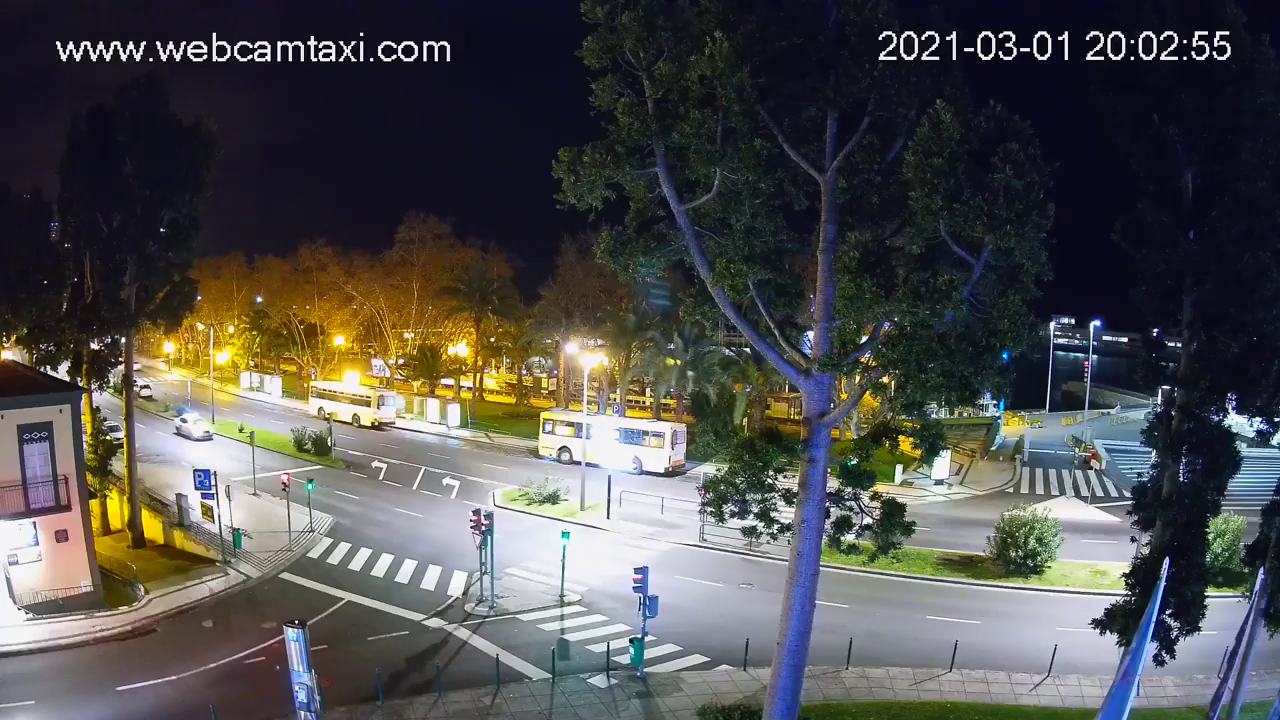

In [150]:
len(vstreams)
#image_w.value = vstreams[4]
image = vstreams[4]
image

In [33]:
type(video.streams)
w = widgets.Dropdown(
    options=video.streams,
    value=video.streams[0],
    description='Task:',
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        #print(type(change['new']))
        #print("changed to %s" % change['new'])
        videoLoop(change['new'])

w.observe(on_change)

display (w)

print(video.streams[0].resolution)
image_w = ipywidgets.Image(format='jpeg')
display(image_w)

Dropdown(description='Task:', options=(normal:mp4@256x144, normal:mp4@426x240, normal:mp4@640x360, normal:mp4@…

256x144


Image(value=b'', format='jpeg')

In [31]:
import ipywidgets
from IPython.display import display

fpsw    = addVisText(key='fps', disabled=True)
framew    = addVisText(key='frame', disabled=True)
sizew    = addVisText(key='size', disabled=True)
renderw = addVisCheckbox(key='render',value=True)

image_w = ipywidgets.Image(format='jpeg')
display(image_w)

Text(value='', description='fps', disabled=True, layout=Layout(width='500px'), style=DescriptionStyle(descript…

Text(value='', description='frame', disabled=True, layout=Layout(width='500px'), style=DescriptionStyle(descri…

Text(value='', description='size', disabled=True, layout=Layout(width='500px'), style=DescriptionStyle(descrip…

Checkbox(value=True, description='render', layout=Layout(width='500px'), style=DescriptionStyle(description_wi…

Image(value=b'', format='jpeg')

In [69]:
type(image.size)

tuple

In [151]:
out = widgets.Output()

cropArea           = [0,0,image.size[0],image.size[1]]
cropNormalizedArea = [0.0,0.0,1.0,1.0]

def crop_image():
    #print(cropArea)
    imagea = image.crop(cropArea)
    image_w.value = getByteArray(imagea)
    
#float(433)/640, int(0.6765625 * 1920)    
    
def toNormalizedValue(value,size):
    return float (value) / size

def fromNormalizedValue(value,size):
    return int(value * size)
    
def toNormalizedMinMax(values,size):    
    xmin = toNormalizedValue(values[0],size[0])
    ymin = toNormalizedValue(values[1],size[1])
    xmax = toNormalizedValue(values[2],size[0])
    ymax = toNormalizedValue(values[3],size[1])
    return (xmin,ymin,xmax,ymax)    
    
def fromNormalizedMinMax(values,size):    
    xmin = fromNormalizedValue(values[0],size[0])
    ymin = fromNormalizedValue(values[1],size[1])
    xmax = fromNormalizedValue(values[2],size[0])
    ymax = fromNormalizedValue(values[3],size[1])
    return [xmin,ymin,xmax,ymax]
     
def on_value_change_crop_xmin(change):
    cropx1.min  = change['new']
    cropArea[0] = change['new']
    crop_image()
            
def on_value_change_crop_xmax(change):
    cropx0.max  = change['new']
    cropArea[2] = change['new']
    crop_image()
    
def on_value_change_crop_ymin(change):
    cropy1.min  = change['new']
    cropArea[1] = change['new']
    crop_image()
            
def on_value_change_crop_ymax(change):
    cropy0.max  = change['new']
    cropArea[3] = change['new']
    crop_image()    
    
cropx0 = widgets.IntSlider(value=0, min=0,max=image.size[0],step=1, description='x0',layout=layout)
cropx1 = widgets.IntSlider(value=image.size[0], min=0,max=image.size[0],step=1, description='x1',layout=layout)
cropx0.observe(on_value_change_crop_xmin, 'value')
cropx1.observe(on_value_change_crop_xmax, 'value')

cropy0 = widgets.IntSlider(value=0, min=0,max=image.size[1],step=1, description='y0',layout=layout)
cropy1 = widgets.IntSlider(value=image.size[1], min=0,max=image.size[1],step=1, description='y1',layout=layout)
cropy0.observe(on_value_change_crop_ymin, 'value')
cropy1.observe(on_value_change_crop_ymax, 'value')

#cropx1.observe(on_value_change, 'value')

#{'name': 'value', 'old': 36, 'new': 1879, 'owner': IntSlider(value=1879, description='size:', layout=Layout(width='500px'), max=1920), 'type': 'change'}

crop_hbox_x = widgets.HBox([cropx0, cropx1])
crop_hbox_y = widgets.HBox([cropy0, cropy1])
crop_vbox   = widgets.VBox([crop_hbox_x, crop_hbox_y, out])

tab  = widgets.Tab(children = [crop_vbox])
tab.set_title(0, 'crop')
#display (cropx0)
display (tab)
print(image.size[0])
image_w = ipywidgets.Image(format='jpeg')

display(image_w)

1280


Image(value=b'', format='jpeg')

In [152]:
to = toNormalizedMinMax(cropArea,image.size)
fr = fromNormalizedMinMax(to,image.size)
to,fr,cropArea

((0.221875, 0.6875, 0.58203125, 0.9472222222222222),
 [284, 495, 745, 682],
 [284, 495, 745, 682])

In [149]:
def on_value_change_select(change):
    image = vstreams[change['new']]
    fr = fromNormalizedMinMax(to,image.size)
    global imagea
    imagea = image.crop(fr)
    image_w.value = getByteArray(imagea)
    #print(imagea.size)

imageselectw = widgets.IntSlider(value=0, min=0,max=len(vstreams)-1,step=1, description='image',layout=layout)
display(imageselectw)
imageselectw.observe(on_value_change_select, 'value')

IntSlider(value=0, description='image', layout=Layout(width='500px'), max=5)

(80, 33) (640, 264)
0 108


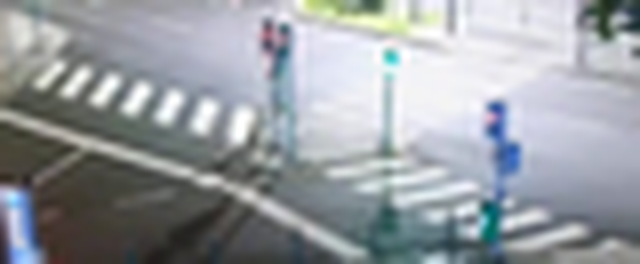

In [171]:
#https://stackoverflow.com/questions/44070427/whats-the-difference-between-various-image-resizing-algorithms-in-the-module-of

#imagea.resize((640,480),Image.ANTIALIAS)
#imagea.resize((640,480),Image.NEAREST)

w= 640 
h= 480
ratio = h / imagea.size[1]
newsize = (int(ratio * imagea.size[0]), int(ratio * imagea.size[1]) )

ratio = w / imagea.size[0]
newsize = (int(ratio * imagea.size[0]), int(ratio * imagea.size[1]) )

print(imagea.size,newsize)

imageb = imagea.resize(newsize,Image.LANCZOS)
#imagea.thumbnail((80, 80), Image.ANTIALIAS)

new_size = (640, 480)

v = print(int((new_size[0]-imageb.size[0])/2), int((new_size[1]-imageb.size[1])/2))

new_im = Image.new("RGB", new_size)   ## luckily, this is already black!
new_im.paste(imageb, v)

imageb

In [ ]:
import ipywidgets as widgets

out = widgets.Output()
def on_value_change(change):
    with out:
        print(change['new'])

slider = widgets.IntSlider(min=1, max=100, step=1, continuous_update=True)
play = widgets.Play(min=1, interval=2000)

slider.observe(on_value_change, 'value')
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.VBox([play, slider, out])

In [48]:
def f(a, b):
    imagea = image.crop((200, 200, 600 + a, 600 + b))
    image_w.value = getByteArray(imagea)
    print(a,b)
    return
w = widgets.interactive(f, a=100, b=100)
display(w)

interactive(children=(IntSlider(value=100, description='a', max=300, min=-100), IntSlider(value=100, descripti…

In [ ]:
image_w.value = getByteArray(image)

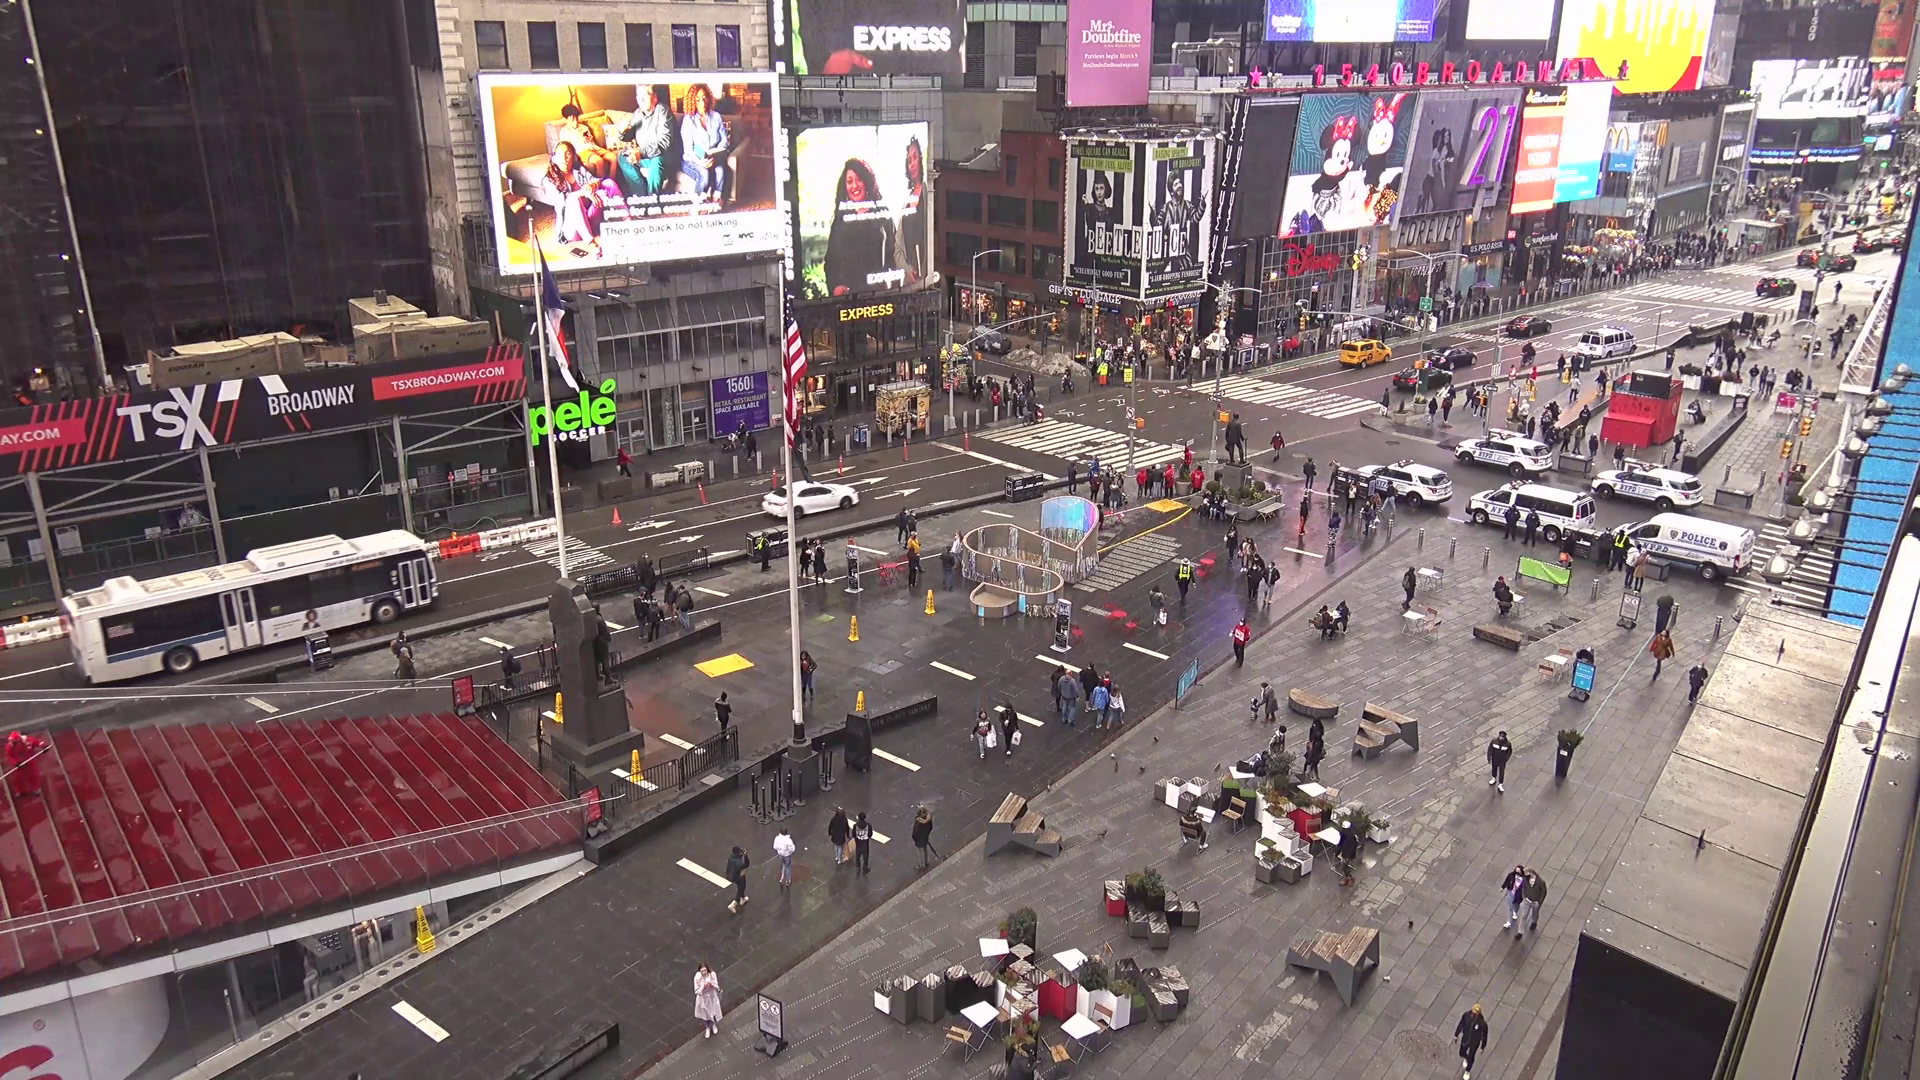

In [41]:
#img = ImageTool(image=image)
#image.crop((200, 200, 600, 600))
image

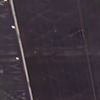

In [22]:
img.crop(0,0,100,100)
img.image

In [ ]:
import io
img_byte_arr = io.BytesIO()
img.image.save(img_byte_arr, format='PNG')
img_byte_arr = img_byte_arr.getvalue()
image_w.value = img_byte_arr

In [ ]:
fpsw    = addVisText(key='fps')
renderw = addVisCheckbox(key='',value=True)
box = widgets.Checkbox(False, description='checker')
display(box)

def changed(b):
    fpsw.value = str(box.value)
    #print(b)

renderw.observe(changed)
box.observe(changed)

In [ ]:
import threading
from IPython.display import display
import ipywidgets as widgets
def f(a, b):
    return

w = widgets.interactive(f, a=10, b=20)

def work(w):
    for ii in range(10):
        time.sleep(1)
        print(w.kwargs, w.result)

thread = threading.Thread(target=work, args=(w,))
display(w)
#thread.start()

In [ ]:
import enum
import cv2
#from .jpeg_encoder import JpegEncoder
import JpegEncoder

_ENCODER = JpegEncoder(width=224, height=224, fps=21)


def bgr8_to_jpeg_gst(value):
    return _ENCODER.encode(value)


def bgr8_to_jpeg(value, quality=75):
    return bytes(cv2.imencode('.jpg', value)[1])
image_w.value = bgr8_to_jpeg(image[:, ::-1, :])

In [ ]:
type(frame)
sizey=480
image = Image.fromarray(frame)
img = ImageTool(image=image,h=sizey)
#display(img.image)
clear_output(wait=True)
print('2')
#display(img.image)